# Семинар 6. Степенной метод. QR алгоритм

## Экспериментально посмотрим на сходимость степенного метода

$$x_{k+1} = \frac{Ax_k}{\|Ax_k\|} $$

- Теоретическая скорость сходимости **линейная** с фактором $\frac{|\lambda_2|}{|\lambda_1|}$

In [43]:
import numpy as np

def power_method(A, x0, max_iter, eps):
    x = x0.copy()
    conv = [x]
    for i in range(max_iter):
        x = A @ x
        x = x / np.linalg.norm(x)
        conv.append(x)
        eigval = x @ (A @ x)
        res = A @ x - eigval * x
        if np.linalg.norm(res) < eps:
            break
    return x, eigval, conv

### Симметричная положительно определённая матрица

In [48]:
np.random.seed(0)
n = 100
A = np.random.randn(n, n)
A = A.T @ A

true_eigvals, true_eigvec = np.linalg.eigh(A)
print(true_eigvals)
print(true_eigvec)

[9.08050598e-05 5.98738933e-03 9.44215434e-02 3.69030606e-01
 4.09806706e-01 4.55736343e-01 9.08505859e-01 1.33621119e+00
 1.41027596e+00 1.85518946e+00 2.86702867e+00 3.18195816e+00
 3.67297697e+00 4.33200403e+00 4.87305139e+00 5.84238777e+00
 7.22920186e+00 7.92468749e+00 8.25763141e+00 9.77947698e+00
 1.02729795e+01 1.17100102e+01 1.23221010e+01 1.29426268e+01
 1.57507249e+01 1.67271149e+01 1.69323290e+01 1.83603872e+01
 1.92439586e+01 2.11926036e+01 2.33119037e+01 2.44001004e+01
 2.68565712e+01 2.78273001e+01 3.07023785e+01 3.17923926e+01
 3.32659145e+01 3.61619443e+01 3.66202382e+01 4.05640198e+01
 4.12172214e+01 4.20182719e+01 4.40093414e+01 4.59955289e+01
 4.91454558e+01 5.25278841e+01 5.36208303e+01 5.66290426e+01
 6.11072508e+01 6.36642417e+01 6.67790025e+01 7.18717500e+01
 7.53102151e+01 7.69637054e+01 8.05181031e+01 8.42937297e+01
 8.66480959e+01 9.06328877e+01 9.70358984e+01 9.91344601e+01
 1.02186114e+02 1.04807972e+02 1.06496298e+02 1.08614964e+02
 1.11090944e+02 1.133129

In [49]:
x0 = np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 50, 1e-6)
print(max_eigvec)
print(max_eigval)

[-0.20164173  0.0211452   0.21118606 -0.01070128 -0.00774108 -0.03139186
  0.03321268 -0.10560683  0.05645997 -0.00698722 -0.23470528 -0.03265035
  0.02300771 -0.10290656  0.17447069  0.14139868  0.06643902  0.10489436
  0.21880245  0.02927642  0.03881796  0.07915609 -0.01069713 -0.00218077
  0.0280816   0.1474271   0.05530596 -0.16580875 -0.1677816   0.00711156
 -0.0049217   0.05371498  0.08466254  0.04258457 -0.0435248  -0.02307192
 -0.03106581  0.01033373  0.08255295  0.07982712 -0.09225283 -0.09851813
  0.16307777 -0.11423996  0.00055458 -0.09468471  0.10981967 -0.09589869
  0.09746109  0.07208115  0.02008165 -0.08510647  0.11741723  0.03664266
  0.05407434  0.2372944   0.02485767  0.00668875 -0.01112236 -0.05739662
 -0.00969408 -0.00777916 -0.0444125  -0.01451608 -0.07719981  0.16362264
  0.11112818  0.19195461 -0.13644416  0.00387027 -0.18204477 -0.09990349
 -0.02495952  0.11412773  0.14881308  0.03723453 -0.00838413  0.07455278
 -0.00105356  0.06514807  0.1785789   0.15664862  0

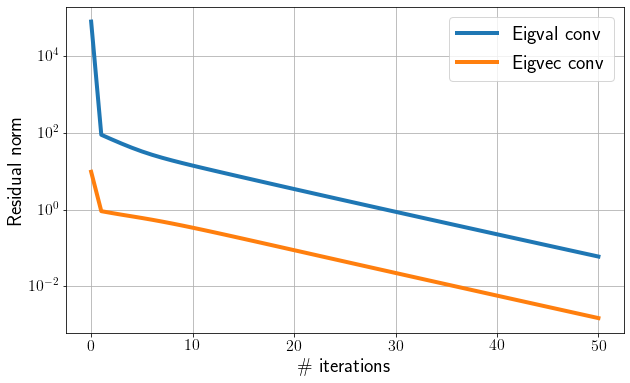

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=True)

power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")
power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, -1] * true_eigvec[:, -1]) for x in conv])
plt.plot(power_method_eigvec_conv, linewidth=4, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [51]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(power_method_eigvec_conv[1:] / power_method_eigvec_conv[:-1])
print(true_eigvals[-2] / true_eigvals[-1])

[0.00111126 0.76334892 0.77052966 0.78185062 0.79891308 0.81791715
 0.83491388 0.84772505 0.85626571 0.86152633 0.86463942 0.86647893
 0.86761034 0.86836437 0.86892173 0.86937599 0.86977319 0.87013476
 0.87047004 0.87078285 0.87107473 0.87134649 0.87159886 0.87183274
 0.87204924 0.87224961 0.87243524 0.87260753 0.87276791 0.87291776
 0.87305838 0.87319102 0.87331682 0.87343685 0.87355206 0.87366334
 0.87377149 0.87387723 0.8739812  0.874084   0.87418613 0.87428809
 0.87439029 0.87449311 0.87459691 0.87470199 0.87480864 0.8749171
 0.87502763 0.87514041]
[0.09376068 0.89732463 0.90166615 0.90645306 0.90482449 0.89995928
 0.89438266 0.88920835 0.88482032 0.8812833  0.87852906 0.87644119
 0.87489502 0.87377562 0.87298483 0.87244252 0.87208528 0.871864
 0.87174125 0.87168891 0.87168605 0.8717173  0.87177144 0.87184041
 0.87191849 0.87200166 0.87208721 0.87217331 0.87225882 0.87234308
 0.87242576 0.87250678 0.87258622 0.87266425 0.87274115 0.8728172
 0.87289273 0.87296809 0.87304362 0.873119

### Симметричная матрица

- Cобственные значений вещественные

In [63]:
n = 10
A = np.random.randn(n, n)
A = A + A.T
true_eigvals, true_eigvec = np.linalg.eig(A)
print(true_eigvals)
print(true_eigvec)

[-7.02053206 -4.85616511 -3.92744905 -2.73074607  6.8707679   0.04818641
  1.62427467  2.30764878  4.86805972  4.33091631]
[[ 0.37612741  0.40678824 -0.23595508 -0.23028983  0.42178306  0.09459833
   0.27691917  0.52937525 -0.19879131 -0.03245211]
 [ 0.11130951  0.0737817   0.0552649  -0.29753725 -0.13602725  0.46846228
   0.13611933  0.00441043  0.72125902  0.33743296]
 [ 0.26372197  0.46552548 -0.20581079  0.7228868  -0.25629705  0.15066795
  -0.17743825 -0.00072557  0.15026363 -0.07975157]
 [ 0.06624221 -0.28828623 -0.48078837  0.02980242  0.26247244  0.26184964
   0.25042168 -0.38712256  0.16108671 -0.55179394]
 [-0.07919939  0.49170937  0.29182409 -0.01214072 -0.02138162 -0.13448877
   0.61215384 -0.51291102 -0.10058801  0.01297199]
 [ 0.03831977  0.37929928  0.31148464 -0.31142457  0.20663081 -0.09736386
  -0.52513901 -0.12792249  0.24247184 -0.50749577]
 [-0.24585666 -0.13157836  0.3541711   0.23825504 -0.10725122 -0.09227344
   0.38341542  0.52348789  0.30042937 -0.45685559]
 [

In [64]:
x0 = np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 500, 1e-6)
print(max_eigvec)
print(max_eigval)

[ 0.37615351  0.11130109  0.26370611  0.06625845 -0.07920072  0.03833256
 -0.24586329  0.56628479 -0.40980954  0.46408652]
-7.020532011225317


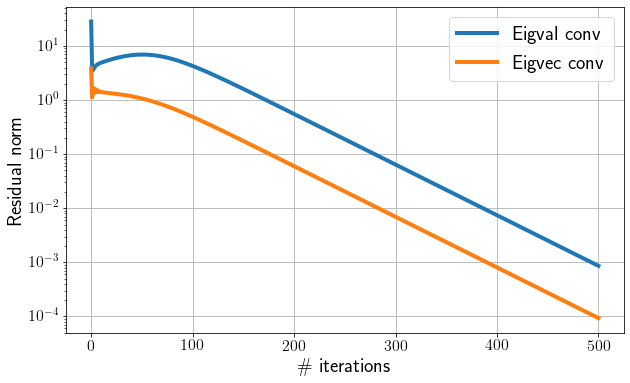

In [65]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argmax(np.abs(true_eigvals))

power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, idx] * true_eigvec[:, idx]) for x in conv])
plt.plot(power_method_eigvec_conv, linewidth=4, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [66]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(power_method_eigvec_conv[1:] / power_method_eigvec_conv[:-1])
sorted_abs_eigvals = np.sort(np.abs(true_eigvals))
print(sorted_abs_eigvals[-2] / sorted_abs_eigvals[-1])

[0.12303234 1.04013653 1.07599681 1.07254348 1.05148056 1.03528534
 1.02583594 1.02076609 1.01808575 1.01662904 1.01578221 1.01523485
 1.01483227 1.01449773 1.01419319 1.01389975 1.01360798 1.01331318
 1.013013   1.01270627 1.01239239 1.01207108 1.01174223 1.0114058
 1.0110618  1.01071029 1.01035135 1.00998507 1.00961159 1.00923103
 1.00884357 1.00844938 1.00804865 1.00764162 1.00722851 1.00680958
 1.0063851  1.00595537 1.0055207  1.0050814  1.00463782 1.00419032
 1.00373927 1.00328503 1.00282802 1.00236863 1.00190728 1.00144437
 1.00098035 1.00051563 1.00005064 0.99958583 0.99912161 0.99865843
 0.9981967  0.99773685 0.99727928 0.99682441 0.99637263 0.99592432
 0.99547986 0.9950396  0.99460389 0.99417306 0.99374741 0.99332725
 0.99291285 0.99250447 0.99210235 0.99170672 0.99131777 0.9909357
 0.99056066 0.99019281 0.98983227 0.98947915 0.98913354 0.98879551
 0.98846513 0.98814244 0.98782745 0.98752017 0.98722061 0.98692875
 0.98664454 0.98636796 0.98609893 0.98583741 0.9855833  0.985336

## Несимметричная матрица

In [72]:
A = np.random.randn(n, n)

true_eigvals, true_eigvec = np.linalg.eig(A)
print(true_eigvals)
print(np.sort(np.abs(true_eigvals)))
print(true_eigvec)

[-2.83780565+1.20971862j -2.83780565-1.20971862j -2.06956964+0.j
 -0.30211111+1.72114986j -0.30211111-1.72114986j  2.40677456+0.j
  1.75789499+0.84415218j  1.75789499-0.84415218j  1.06261395+0.j
 -0.61007171+0.j        ]
[0.61007171 1.06261395 1.7474633  1.7474633  1.95007377 1.95007377
 2.06956964 2.40677456 3.08489222 3.08489222]
[[-0.27873975-0.06217994j -0.27873975+0.06217994j  0.11117339+0.j
   0.48115583+0.j          0.48115583-0.j         -0.12787192+0.j
   0.23394338+0.26612603j  0.23394338-0.26612603j -0.63447685+0.j
   0.37921869+0.j        ]
 [-0.37880375-0.20237614j -0.37880375+0.20237614j  0.11765181+0.j
  -0.0788079 -0.17719679j -0.0788079 +0.17719679j  0.62805625+0.j
   0.53109767+0.j          0.53109767-0.j         -0.21076636+0.j
   0.64347325+0.j        ]
 [-0.1093476 +0.36729005j -0.1093476 -0.36729005j  0.27674348+0.j
  -0.20059179+0.09939483j -0.20059179-0.09939483j -0.31954688+0.j
  -0.23332818+0.13359956j -0.23332818-0.13359956j -0.08957217+0.j
   0.20550852+0.j 

In [77]:
x0 = np.random.randn(n) + 1j * np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 4000, 1e-6)
print(max_eigvec)
print(max_eigval)

[ 0.1252644 +0.02618409j  0.15859788-0.12301944j  0.08780154+0.53729193j
 -0.03624352-0.19473473j -0.0911794 -0.34863425j  0.09391573+0.57124503j
  0.02232281-0.12993481j  0.04951977-0.19146776j  0.09814836-0.02674422j
 -0.21132337-0.17666142j]
(2.1362332924218124-0.9107642373543682j)


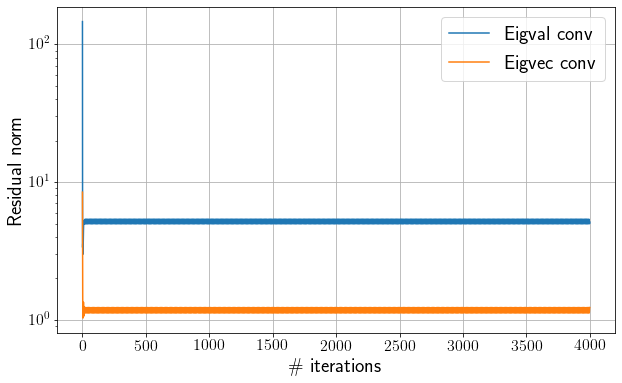

In [78]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, label="Eigval conv")

idx = np.argmax(np.abs(true_eigvals))

power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, idx] * true_eigvec[:, idx]) for x in conv])
plt.plot(power_method_eigvec_conv, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [79]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(power_method_eigvec_conv[1:] / power_method_eigvec_conv[:-1])
sorted_abs_eigvals = np.sort(np.abs(true_eigvals))
print(sorted_abs_eigvals[-2] / sorted_abs_eigvals[-1])

[0.02296109 1.06214314 0.84640122 ... 0.97906027 1.00127829 1.02695376]
[0.25126691 0.69027177 0.71280147 ... 1.03525834 1.03217144 1.00712045]
1.0


In [80]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(power_method_eigvec_conv[1:] / power_method_eigvec_conv[:-1])
sorted_abs_eigvals = np.sort(np.abs(true_eigvals))
print(sorted_abs_eigvals[-2] / sorted_abs_eigvals[-1])

[0.02296109 1.06214314 0.84640122 ... 0.97906027 1.00127829 1.02695376]
[0.25126691 0.69027177 0.71280147 ... 1.03525834 1.03217144 1.00712045]
1.0


### Если $\lambda^*_2 = \lambda_1$, то степенной метод осциллирует и не сходится! 

### Другие проблемные случаи

1) $\lambda_1 = \lambda_2$

2) $\lambda_1 = -\lambda_2$

### Если $\lambda_1 = \lambda_2$ 

In [82]:
A = np.random.randn(n, n)
Q, _ = np.linalg.qr(A)
A = Q @ np.diagflat([2, 2] + list(np.random.rand(n - 2))) @ Q.T

In [83]:
true_eigvals, true_eigvec = np.linalg.eig(A)
print(true_eigvals)
print(np.abs(true_eigvals))
print(true_eigvec)

[0.12601654 0.17208208 0.78372442 0.63821296 0.55021896 0.41011705
 0.48222939 0.45868043 2.         2.        ]
[0.12601654 0.17208208 0.78372442 0.63821296 0.55021896 0.41011705
 0.48222939 0.45868043 2.         2.        ]
[[-0.49328858 -0.30169193  0.31275299  0.34105874 -0.07561694  0.21567655
   0.51975589 -0.29664994 -0.20280829 -0.05256033]
 [ 0.24790792 -0.38260751  0.13480373 -0.00711334 -0.35599965 -0.22581093
   0.19225113  0.15352487  0.32282532 -0.5507478 ]
 [ 0.05259502 -0.134697    0.47978755 -0.01685302 -0.27442508  0.42964491
  -0.66061053 -0.21812584 -0.03073881 -0.06731959]
 [ 0.0640452  -0.47218768 -0.13964186 -0.515712    0.0067576  -0.3203181
  -0.05845082 -0.36244812 -0.49877196 -0.09483905]
 [-0.23813645 -0.06930725  0.21173163 -0.47349557  0.53704497  0.09120534
   0.05128136 -0.21915528  0.56130187  0.06463289]
 [ 0.23903101  0.2968522   0.45981031 -0.3105708  -0.41668929 -0.19189934
   0.33575921 -0.10380065  0.12741517  0.4613382 ]
 [ 0.1785948  -0.38026886

In [85]:
x0 = np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 1000, 1e-6)
print(max_eigvec)
print(max_eigval)

[-0.19180051  0.09184432 -0.0490407  -0.46011787  0.50363799  0.26461461
  0.37274336 -0.01794426 -0.51474452  0.11300483]
1.9999999999998317


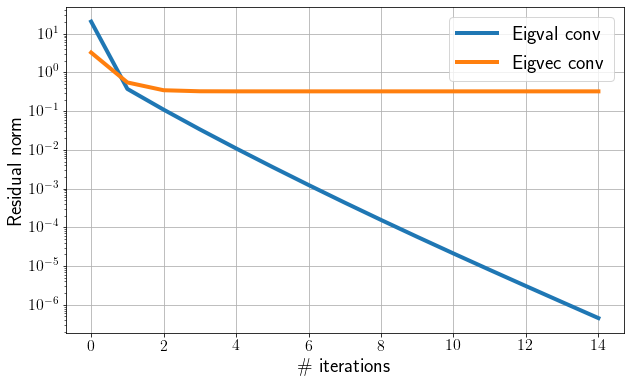

In [86]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argmax(np.abs(true_eigvals))

power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, idx] * true_eigvec[:, idx]) for x in conv])
plt.plot(power_method_eigvec_conv, linewidth=4, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [87]:
alpha = np.linalg.lstsq(true_eigvec[:, n-2:], max_eigvec, rcond=None)[0]

In [89]:
print("Accuracy = {}".format(np.linalg.norm(true_eigvec[:, n-2:] @ alpha - max_eigvec)))

Accuracy = 3.71012805616566e-07


### Если $\lambda_1 = -\lambda_2$

In [91]:
A = np.random.randn(n, n)
Q, _ = np.linalg.qr(A)
A = Q @ np.diagflat([2, -2] + list(np.random.rand(n - 2))) @ Q.T

In [92]:
true_eigvals, true_eigvec = np.linalg.eig(A)
print(true_eigvals)
print(np.abs(true_eigvals))
print(true_eigvec)

[-2.          2.          0.16857443  0.18256606  0.19890333  0.50601316
  0.83178461  0.63067108  0.74880324  0.70424453]
[2.         2.         0.16857443 0.18256606 0.19890333 0.50601316
 0.83178461 0.63067108 0.74880324 0.70424453]
[[-0.20223945  0.43890124  0.43719374  0.32711364  0.26747088  0.34000626
  -0.11223436  0.32844742  0.39723546  0.05392592]
 [-0.191438   -0.34622414 -0.29077796  0.24747454  0.36658826 -0.29773606
  -0.44824669  0.50390701 -0.12526984 -0.06411903]
 [-0.58283943 -0.02286009 -0.43904898 -0.24182006 -0.42046116  0.345122
  -0.10420466  0.10783493  0.29035461 -0.07645322]
 [-0.44022929 -0.48831401  0.48185121  0.29836855 -0.20380697 -0.05315457
   0.32709683 -0.02972898 -0.12267336 -0.28152376]
 [ 0.26290423  0.03392273 -0.25911361  0.10760935  0.22213425  0.26298092
   0.18633225 -0.00377922  0.08682429 -0.8308044 ]
 [-0.38258985  0.27268402 -0.02652907  0.00605127  0.27824647  0.29966471
  -0.17431348 -0.33212464 -0.68480164 -0.0407766 ]
 [ 0.11783248 -0

In [107]:
x0 = np.random.randn(n)
max_eigvec, max_eigval, conv = power_method(A, x0, 1000, 1e-6)
print(max_eigvec)
print(max_eigval)

[ 0.32431275  0.07905797  0.5492899   0.27392807 -0.24070526  0.44665818
 -0.27950391  0.08553476  0.41100962  0.00223627]
-1.6417991501579159


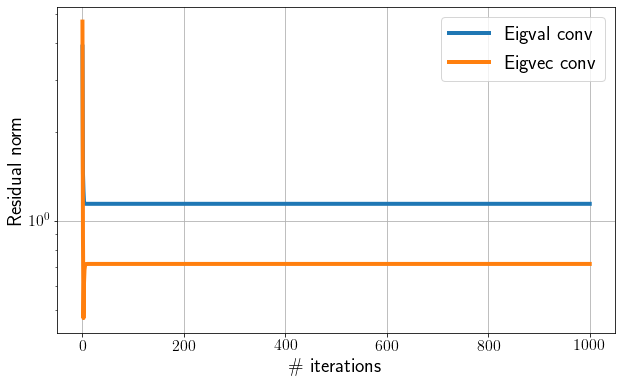

In [108]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - x @ (A @ x) * x) for x in conv])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argmax(np.abs(true_eigvals))

power_method_eigvec_conv = np.array([np.linalg.norm(x - x[0] / true_eigvec[0, idx] * true_eigvec[:, idx]) for x in conv])
plt.plot(power_method_eigvec_conv, linewidth=4, label="Eigvec conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

## Блочный степенной метод

- Ищем $k$ cтарших собственных значения и вектора
- Этапы аналогичны степенному методу для максимального по модулю собственного значения
    - Умножение матрицы на набор векторов
    - Аналог нормализации для матриц?

In [109]:
def block_power_method(A, x0, max_iter, eps):
    x = x0.copy()
    conv_vec = [x]
    conv_val = [np.einsum('ik,ij,jk->k',x, A, x)]
    for i in range(max_iter):
        x = A @ x
        x, _ = np.linalg.qr(x)
        conv_vec.append(x)
        eigval = np.einsum('ik,ij,jk->k', x, A, x)
        conv_val.append(eigval)
        res = A @ x - (eigval[:, np.newaxis] * x.T).T
        if np.linalg.norm(res) < eps:
            break
    return x, eigval, conv_vec, conv_val

### Немного про einsum

In [110]:
A = np.random.randn(n, n)
print(np.trace(A), np.einsum('ii', A))
print(np.diag(A) - np.einsum("ii->i", A))

-1.3511955705645808 -1.3511955705645817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [111]:
x = np.random.randn(n)
print(A @ x - np.einsum('ij,j', A, x))

[-2.22044605e-16  4.44089210e-16  0.00000000e+00 -3.60822483e-16
 -8.88178420e-16 -1.77635684e-15  0.00000000e+00  2.22044605e-16
 -2.22044605e-16  4.44089210e-16]


In [112]:
B = np.random.randn(n, n)
print(np.diag(A @ B) - np.einsum('ij,ji->i', A, B))

[-8.88178420e-16  5.55111512e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.22044605e-16  0.00000000e+00  0.00000000e+00
  1.24900090e-16  0.00000000e+00]


### Более подробное об этой операции см. [тут](https://obilaniu6266h16.wordpress.com/2016/02/04/einstein-summation-in-numpy/)

## Вернёмся к блочному степенному методу

In [113]:
block_size = 3
A = np.random.randn(n, n)
A = A.T @ A
true_eigvals, true_eigvec = np.linalg.eigh(A)
print(true_eigvals)
print(true_eigvec)

[ 0.053053    0.32266035  1.70865185  3.96524435  6.77981221 13.4647965
 13.84847853 17.45962263 26.48905198 49.29861084]
[[-0.29537314 -0.02117981 -0.16777925  0.32037865 -0.11756062 -0.09251125
  -0.01114192  0.74327039  0.38417967 -0.24282895]
 [-0.24102657 -0.37156892  0.35506712  0.13540412 -0.02914834  0.71851227
   0.35907586 -0.02661787  0.09773077  0.05595529]
 [ 0.18795574  0.15828489  0.05306806  0.73621559 -0.0568157   0.1236523
  -0.10480336 -0.00597402 -0.56011095 -0.22699625]
 [ 0.0902212   0.28756286  0.02023236  0.32851701 -0.19225098 -0.12956712
   0.29842413 -0.51319286  0.58182322 -0.23694885]
 [-0.4381588  -0.03120423 -0.27812191  0.21333148  0.14516279 -0.34144187
   0.56573295 -0.08000044 -0.25617205  0.39299911]
 [ 0.30813292  0.46750591 -0.46579696  0.00168565 -0.03287082  0.47947405
   0.10500014  0.1721668   0.1062375   0.43196526]
 [ 0.11753734 -0.4509946  -0.60349221 -0.13737511 -0.48210757  0.08573922
   0.13126831 -0.13280944 -0.15157667 -0.31951516]
 [-0

In [114]:
x0 = np.random.randn(n, block_size)
max_eigvec, max_eigval, conv_vec, conv_val = block_power_method(A, x0, 500, 1e-6)
print(max_eigvec)
print(max_eigval)
print(true_eigvec[:, n-block_size:n][:, ::-1])

[[-0.24282895 -0.38417967  0.74327038]
 [ 0.05595529 -0.09773077 -0.02661778]
 [-0.22699625  0.56011095 -0.00597404]
 [-0.23694885 -0.58182322 -0.5131928 ]
 [ 0.39299911  0.25617205 -0.08000031]
 [ 0.43196526 -0.1062375   0.17216683]
 [-0.31951516  0.15157667 -0.13280941]
 [-0.4796396  -0.02888496 -0.07625059]
 [ 0.08510768 -0.05454748 -0.34099022]
 [ 0.38704181 -0.29481581 -0.08757742]]
[49.29861084 26.48905198 17.45962263]
[[-0.24282895  0.38417967  0.74327039]
 [ 0.05595529  0.09773077 -0.02661787]
 [-0.22699625 -0.56011095 -0.00597402]
 [-0.23694885  0.58182322 -0.51319286]
 [ 0.39299911 -0.25617205 -0.08000044]
 [ 0.43196526  0.1062375   0.1721668 ]
 [-0.31951516 -0.15157667 -0.13280944]
 [-0.4796396   0.02888496 -0.07625062]
 [ 0.08510768  0.05454748 -0.34099009]
 [ 0.38704181  0.29481581 -0.08757736]]


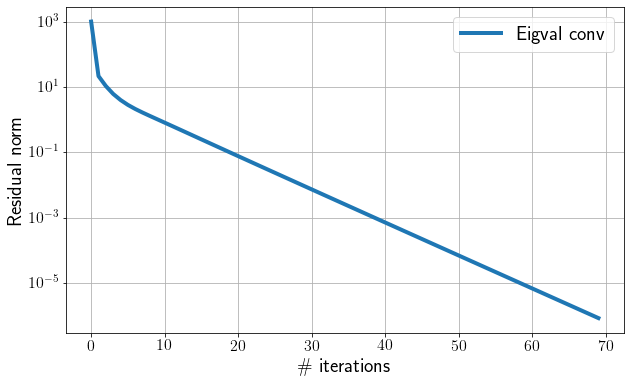

In [115]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - lam * x) for x, lam in zip(conv_vec, conv_val)])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argsort(np.abs(true_eigvals))

plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [117]:
print(power_method_eigval_conv[1:] / power_method_eigval_conv[:-1])
print(true_eigvals[-4] / true_eigvals[-3])
print(true_eigvals[-1], true_eigvals[-2], true_eigvals[-3])

[0.02150471 0.49504562 0.57330245 0.65194056 0.70818045 0.75011071
 0.77570554 0.78723868 0.7907368  0.79095939 0.79031391 0.78970421
 0.78935329 0.78924262 0.78929634 0.78944435 0.78963706 0.78984388
 0.79004788 0.79024084 0.79041964 0.79058386 0.79073442 0.79087275
 0.79100034 0.7911186  0.79122874 0.79133175 0.79142846 0.79151954
 0.79160552 0.79168684 0.79176386 0.79183688 0.79190616 0.79197192
 0.79203436 0.79209364 0.79214994 0.79220341 0.79225417 0.79230237
 0.79234813 0.79239155 0.79243276 0.79247187 0.79250896 0.79254415
 0.79257752 0.79260915 0.79263915 0.79266758 0.79269453 0.79272007
 0.79274427 0.7927672  0.79278892 0.79280949 0.79282897 0.79284742
 0.7928649  0.79288144 0.7928971  0.79291193 0.79292597 0.79293925
 0.79295183 0.79296373 0.79297499]
0.7931716980054303
49.29861083650784 26.489051977195768 17.45962262942466


### Несимметричный случай

In [134]:
# A = np.random.randn(n, n)

A = np.random.randn(n, n)
Q, _ = np.linalg.qr(A)
A = Q @ np.diagflat([2, 2, 2] + list(np.random.rand(n - 3))) @ Q.T

In [135]:
true_eigvals, true_eigvec = np.linalg.eig(A)
block_size = 3
print(true_eigvals)
print(np.sort(np.abs(true_eigvals)))
print(true_eigvec.round(5))

[0.26729328 0.27274439 0.50996257 0.5394178  0.75358103 0.91557531
 0.88435243 2.         2.         2.        ]
[0.26729328 0.27274439 0.50996257 0.5394178  0.75358103 0.88435243
 0.91557531 2.         2.         2.        ]
[[-2.4858e-01 -2.7585e-01  6.8112e-01 -2.5087e-01 -2.8839e-01 -9.7530e-02
  -2.7550e-02 -4.9174e-01 -2.2819e-01 -6.7300e-02]
 [-6.5990e-02  1.4069e-01  1.2655e-01 -2.2860e-02 -1.5510e-02  2.3181e-01
   4.5934e-01  7.8780e-02  1.1379e-01 -7.8470e-01]
 [ 2.3100e-01  7.5863e-01 -1.3240e-02  1.0770e-02 -2.1511e-01  2.2062e-01
  -1.3518e-01 -4.7620e-01 -3.7330e-01  2.7740e-02]
 [ 7.0940e-02  3.7873e-01  3.7382e-01 -5.7852e-01  9.4070e-02 -2.5000e-04
  -9.6260e-02  5.1487e-01  4.7358e-01  1.2119e-01]
 [ 5.4519e-01  8.7910e-02  2.9966e-01  2.2672e-01  2.2409e-01 -6.7477e-01
   1.6466e-01 -3.2340e-02 -1.0028e-01 -6.7710e-02]
 [ 5.8993e-01 -3.2919e-01  7.3150e-02  1.0290e-02 -1.6654e-01  2.9911e-01
  -5.5463e-01  5.1950e-02  1.6474e-01 -3.1923e-01]
 [-4.3092e-01  1.7440e-0

In [136]:
x0 = np.random.randn(n, block_size) #+ 1j * np.random.randn(n, block_size)
max_eigvec, max_eigval, conv_vec, conv_val = block_power_method(A, x0, 500, 1e-6)
print(max_eigvec)
print(max_eigval)
print(true_eigvec[:, n-block_size:n][:, ::-1])

[[-0.08190905 -0.1275704  -0.46779236]
 [-0.49670352 -0.58273935  0.32869738]
 [ 0.08256776 -0.19089556 -0.46298313]
 [-0.05282548  0.40243256  0.44073737]
 [ 0.01934226 -0.14429251  0.0019706 ]
 [-0.27830366 -0.12919445  0.13856938]
 [-0.04763038 -0.42728782  0.17685471]
 [-0.09551137  0.14220473  0.2876658 ]
 [ 0.79143527 -0.41590014  0.28933494]
 [ 0.14622122  0.18018333  0.21811983]]
[2. 2. 2.]
[[-0.06730144 -0.22819093 -0.4917448 ]
 [-0.78469602  0.11378768  0.0787752 ]
 [ 0.02774298 -0.37330245 -0.47620146]
 [ 0.12118662  0.4735814   0.514871  ]
 [-0.06770869 -0.10028283 -0.03233613]
 [-0.31922805  0.16474062  0.05194682]
 [-0.31108914 -0.15322154  0.0494579 ]
 [-0.03920355  0.27553994  0.29463618]
 [ 0.35252248 -0.65026318  0.29917513]
 [ 0.18759081  0.10913191  0.2785949 ]]


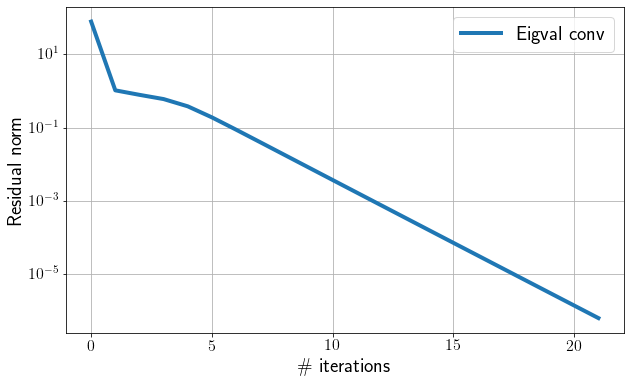

In [137]:
power_method_eigval_conv = np.array([np.linalg.norm(A @ x - lam * x) for x, lam in zip(conv_vec, conv_val)])
plt.figure(figsize=(10, 6))
plt.plot(power_method_eigval_conv, linewidth=4, label="Eigval conv")

idx = np.argsort(np.abs(true_eigvals))

plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("\# iterations", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

#### Какие собственные значения удаётся восстановить, а какие нет?

## QR алгоритм

- Приведение матрицы к форме Шура с помощью унитарных преобразований

$$ A = UTU^*, $$

$T$ – верхнетреугольная матрица.


In [202]:
def qr_algorithm(A, num_iter, eps):
    T = A.copy()
    U = np.eye(A.shape[0])
    conv = [(T, U)]
    for i in range(num_iter):
        Q, R = np.linalg.qr(T)
        T = R @ Q
        U = U @ Q
        conv.append((T, U))
        if np.sum(np.abs(np.tril(T, k=-1))) < eps:
            break
    return T, U, conv[1:]

In [203]:
n = 7
A = np.random.randn(n, n)
# A = A.T @ A
# A = A + A.T
true_eigvals, true_eigvec = np.linalg.eig(A)
print(true_eigvals)

[ 1.88230096+0.j         -1.30670662+2.34144921j -1.30670662-2.34144921j
  0.35222829+0.j         -1.01715429+0.j         -0.88147802+1.47369805j
 -0.88147802-1.47369805j]


In [211]:
T, U, conv = qr_algorithm(A, 1000, 1e-6)
print(np.linalg.norm(A - U @ T @ U.T))
print(T)

2.8814217985458747e-11
[[-1.64790506e+000+4.99369580e-013j -2.54750780e+000+1.52317134e-013j
  -2.31342533e+000+1.52686156e-012j  7.36748219e-001-5.00200182e-012j
  -9.46107429e-001+4.24839643e-012j  4.32698091e-001-5.23929189e-013j
   1.48698866e-001-3.22663829e-013j]
 [ 2.19775609e+000+2.23049694e-015j -9.65508172e-001-5.02255114e-013j
   1.59840409e+000-1.12416813e-012j  6.80591047e-001-4.73137024e-012j
  -9.13462328e-001+3.96664187e-012j -1.66843710e+000+1.32656809e-012j
  -1.31711580e+000+1.60445371e-012j]
 [-4.43679166e-154+1.02911980e-169j -5.22873800e-154+1.00612664e-166j
   1.88230096e+000+8.35909548e-016j  4.97973185e-001-1.58874285e-012j
  -2.03683073e-001+2.02381779e-012j  7.82722668e-001-1.65027387e-013j
   1.37290981e+000-8.80711706e-013j]
 [ 1.47931347e-194-7.77348613e-205j -6.02512071e-195-5.38991405e-206j
  -7.80275368e-041+5.11476430e-051j -1.04669910e+000-1.17830896e-011j
  -9.18138180e-001-1.62133499e-012j  1.30690266e+000+6.67090139e-013j
   2.06861892e+000+8.06975

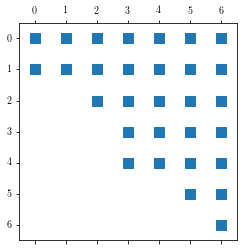

In [213]:
plt.spy(T, markersize=10, precision=1e-6)

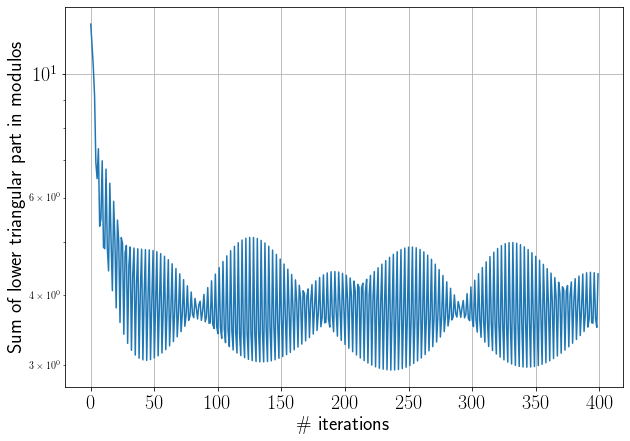

In [207]:
plt.figure(figsize=(10, 7))
conv_qr = np.array([np.sum(np.abs(np.tril(T, k=-1))) for T, U in conv])
plt.plot(conv_qr)
plt.yscale("log")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("\# iterations", fontsize=20)
plt.ylabel("Sum of lower triangular part in modulos", fontsize=20)
plt.grid(True)

In [215]:
np.linalg.eigvals(T), np.linalg.eigvals(A), T.round(4)

(array([-1.30670662+2.34144921e+00j, -1.30670662-2.34144921e+00j,
         1.88230096+8.35909548e-16j, -0.88147802-1.47369805e+00j,
        -0.88147802+1.47369805e+00j, -1.01715429-2.25853622e-16j,
         0.35222829-7.82103912e-17j]),
 array([ 1.88230096+0.j        , -1.30670662+2.34144921j,
        -1.30670662-2.34144921j,  0.35222829+0.j        ,
        -1.01715429+0.j        , -0.88147802+1.47369805j,
        -0.88147802-1.47369805j]),
 array([[-1.6479+0.j, -2.5475+0.j, -2.3134+0.j,  0.7367-0.j, -0.9461+0.j,
          0.4327-0.j,  0.1487-0.j],
        [ 2.1978+0.j, -0.9655-0.j,  1.5984-0.j,  0.6806-0.j, -0.9135+0.j,
         -1.6684+0.j, -1.3171+0.j],
        [-0.    +0.j, -0.    +0.j,  1.8823+0.j,  0.498 -0.j, -0.2037+0.j,
          0.7827-0.j,  1.3729-0.j],
        [ 0.    -0.j, -0.    -0.j, -0.    +0.j, -1.0467-0.j, -0.9181-0.j,
          1.3069+0.j,  2.0686+0.j],
        [ 0.    +0.j,  0.    -0.j, -0.    -0.j,  2.3952-0.j, -0.7163+0.j,
          0.3717-0.j, -1.6399-0.j],
    

## Стохастическая матрица и собственное значение равное 1

**Утверждение.** Пусть дана матрица $A$, в которой элементы неотрицательны и сумма в каждой строке рнавна 1.
Тогда 1 максимальное собственное значение такой матрицы.

**Доказательство.** 
- Возьмём вектор $v$ из всех 1 и вычислим $Av$. 
- В силу равенства 1 суммы элементов в каждой строке $Av$ также будет вектором из всех 1. 
- Значит вектор $v$ собственный вектор для собственного значения 1
- Теперь воспользуемся теоремой Гершгорина: все собственные значения лежат в объединении кругов с центром в точках $a_{ii}$ и радиусом $1 - a_{ii}$
- Значит ни один из шаров не имеет точек расположенных дальше 1 и -1
- А значит и все собственные значения по модулю меньше 1 

## Резюме

- Сходимость степенного метода
- Сходимость QR алгоритма
- Использование спектрального разложения для вычисления матричных рядов